In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_data(path):
    with open(path, 'r') as fr:
        res_data = []
        lines = fr.readlines()
        for line in lines:
            line = line.strip()
            nums = line.split(' ')
            nums = list(map(lambda x: 0 if x == '?' else float(x), nums))
            nums[22] = 1 if nums[22] == 2 or nums[22] == 3 else 0
            res_data.append(nums)
        return res_data

train_path_processed = './horse-colic/horse-colic.data.processed'
test_path_processed = './horse-colic/horse-colic.test.processed'
def save_to_csv():
    train_path = './horse-colic/horse-colic.data'
    test_path = './horse-colic/horse-colic.test'
    columns = ['surgery', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain - a subjective judgement of the horse\'s pain level', 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination - feces', 'abdomen', 'packed cell volume', 'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion', 'type of lesion1', 'type of lesion2', 'type of lesion3', 'cp_data']
    df_train = pd.DataFrame(np.array(read_data(train_path)), columns=columns)
    df_test = pd.DataFrame(np.array(read_data(test_path)), columns=columns)
    df_train.to_csv(train_path_processed, index=False)
    df_test.to_csv(test_path_processed,index=False)
save_to_csv()

usecols = ['rectal temperature', 'pulse', 'outcome']
df_train = pd.read_csv(train_path_processed, usecols=usecols)
df_test = pd.read_csv(test_path_processed, usecols=usecols)
print(df_train.shape, df_test.shape)
#  delete the row with 0
df_train = df_train[~df_train['rectal temperature'].isin([0])]
df_train = df_train[~df_train['pulse'].isin([0])]
df_test = df_test[~df_test['rectal temperature'].isin([0])]
df_test = df_test[~df_test['pulse'].isin([0])]

X_train = np.array(df_train[['rectal temperature', 'pulse']])
y_train = np.array(df_train['outcome'])
X_test = np.array(df_test[['rectal temperature', 'pulse']])
y_test = np.array(df_test['outcome'])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(300, 3) (68, 3)
(234, 2) (234,) (59, 2) (59,)


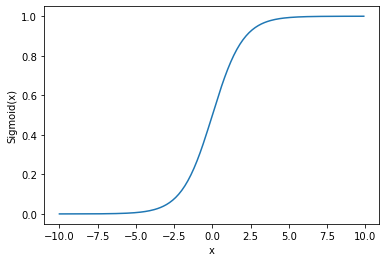

In [62]:
def show_sigmoid_func():
    x = np.arange(-10, 10, 0.1)
    s = 1 / ( 1 + np.exp(-x))
    plt.xlabel('x')
    plt.ylabel('Sigmoid(x)')
    plt.plot(x,s)
    plt.show()
show_sigmoid_func()

In [63]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

def predict_function(weight, feature):
    num_sample = feature.shape[0]
    Y_prediction = np.zeros(num_sample)

    A = sigmoid(np.dot(feature, weight))
    for  i in range(num_sample):
        if A[i]>0.5:
            Y_prediction[i] = 1
        else:
            Y_prediction[i] = 0
    return Y_prediction

def augmented_feature(feature):
    num_sample = feature.shape[0]
    feature_1 = np.ones(num_sample)
    return np.column_stack((feature, feature_1))

def logistic_regression(X_train,y_train,X_test,y_test,learning_rate=0.1,num_iterations=2000,print_cost=False):
    X_train = augmented_feature(X_train)
    X_test = augmented_feature(X_test)
    costs = []
    w = np.zeros(3)
    num_sample, num_feature = X_train.shape
    for i in range(num_iterations):
        predict = sigmoid(np.dot(X_train, w))
        cost = - (1/num_sample) * np.sum(y_train*np.log(predict) + (1-y_train)*np.log(1-predict) )
        if i % 100 == 99: costs.append(cost)
        gradient = np.dot(X_train.T, predict - y_train) / num_feature
        w = w - gradient * learning_rate
    
    prediction_train = predict_function(w, X_train)
    prediction_test = predict_function(w, X_test)

    #计算准确率，分别在训练集和测试集上：
    accuracy_train = 1 - np.mean(np.abs(prediction_train - y_train))
    accuracy_test = 1 - np.mean(np.abs(prediction_test - y_test))
    print("Accuracy on train set:",accuracy_train )
    print("Accuracy on test set:",accuracy_test )

   #为了便于分析和检查，我们把得到的所有参数、超参数都存进一个字典返回出来：
    d = {"costs": costs,
         "w" : w,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_acy":accuracy_train,
         "test_acy":accuracy_test
        }
    return d
num_iterations = 4000
d = logistic_regression(X_train, y_train, X_test, y_test, num_iterations = num_iterations, learning_rate = 1e-5, print_cost = False)
print(d['w'])

Accuracy on train set: 0.6837606837606838
Accuracy on test set: 0.728813559322034
[-0.07633064  0.03203682  0.00125518]


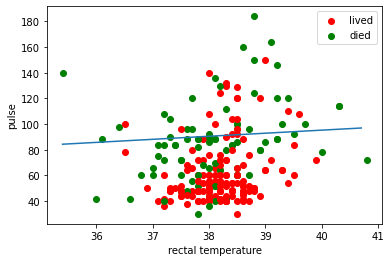

In [64]:
plt.xlabel('rectal temperature')
plt.ylabel('pulse')

rectal_temperature = np.squeeze(X_train[:, 0])
pulse = np.squeeze(X_train[:, 1])
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        s1 = plt.scatter(rectal_temperature[i], pulse[i], color = 'r')
    elif y_train[i] == 1:
        s2 = plt.scatter(rectal_temperature[i], pulse[i], color = 'g')
min_x = np.min(rectal_temperature)
max_x = np.max(rectal_temperature)
x = np.arange(min_x, max_x, 0.1)
weight = d['w'][:2]
bias = d['w'][2]
y = - ( bias + weight[0] * x) / weight[1]
decision = plt.plot(x,y)
plt.legend(handles=(s1,s2),labels=('lived','died'),loc='best')
plt.show()


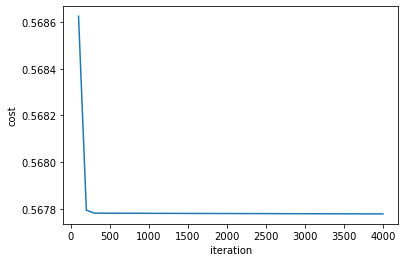

In [65]:
costs = d['costs']
iter_range = np.arange(100, num_iterations + 100, 100)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.plot(iter_range, costs)
plt.show()